In [29]:
import sys
if not '/home/pop518504/git/gknet-benchmarks' in sys.path:
    sys.path.insert(0, '/home/pop518504/git/gknet-benchmarks')
    
from utils import *
from jax_utils import * 
import seaborn as sns
sns.set_style("darkgrid")
figsize = (23, 10)

super_cells = load_super_cells_from_pickle("/home/pop518504/git/gknet-benchmarks/make_supercells/supercells_108_23328.pickle")

ase = load_results_from_pickle("pickles/ase_nl/ase_nl_runtime.pickle")
jaxmd_pair = load_results_from_pickle("pickles/jaxmd_pair/jaxmd_pair_runtime.pickle")
jaxmd_nl = load_results_from_pickle("pickles/jaxmd_nl/jaxmd_nl_runtime.pickle")
jaxmd_gnn = load_results_from_pickle("pickles/jaxmd_gnn/jaxmd_gnn_runtime.pickle")

results = ase + jaxmd_pair + jaxmd_nl + jaxmd_gnn

# 1. All calculators by equal property set
## 1.1 energies, forces, stress, stresses

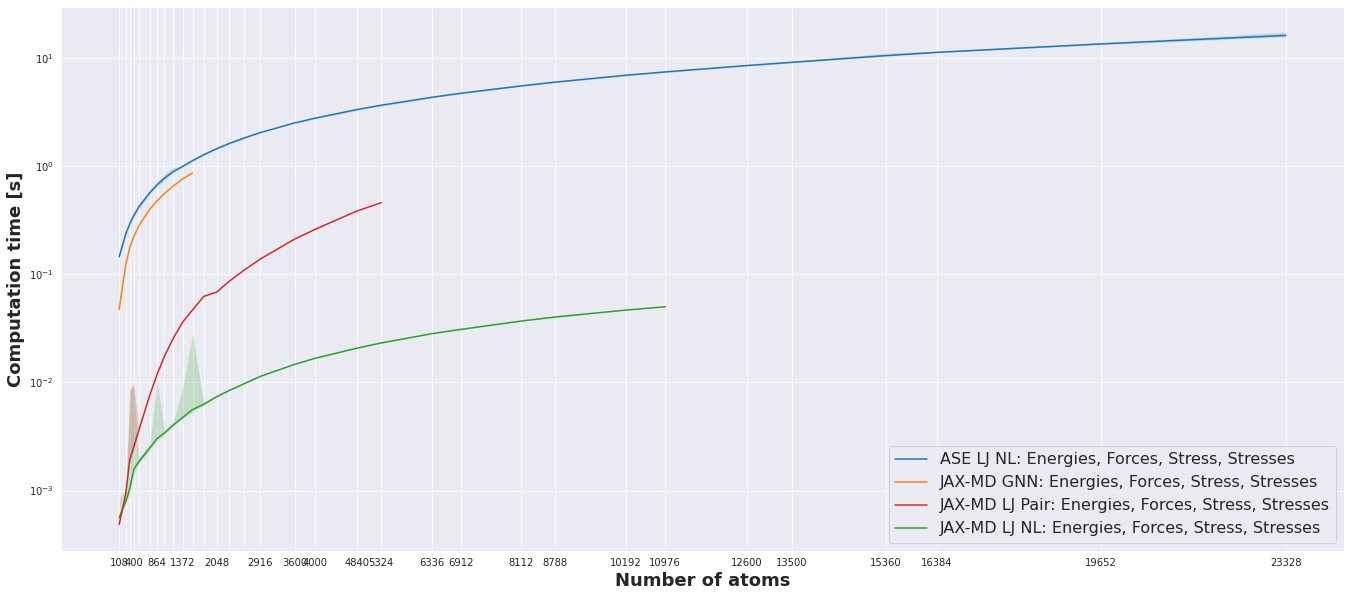

In [30]:
stress_and_stresses = list(filter(lambda r: "ASE" in r.calculator.description or r.calculator._stress and r.calculator._stresses, results))
fig, ax = plot_runtimes(results=stress_and_stresses, shade_by='minmax', figsize=figsize)

handles, labels = ax.get_legend_handles_labels()
new_handles = [None, None, None, None]
new_labels = [None, None, None, None]

# ASE LJ NL
new_handles[0] = handles[0]
new_labels[0] = labels[0]

# JAX-MD GNN
new_handles[1] = handles[1]
new_labels[1] = labels[1]

# JAX-MD LJ Pair
new_handles[2] = handles[3]
new_labels[2] = labels[3]

# JAX-MD LJ NL
new_handles[3] = handles[2]
new_labels[3] = labels[2]

ax.legend(new_handles, new_labels, prop={'size': 16})
fig.set_visible(True)

## 1.2 energies, forces, stress

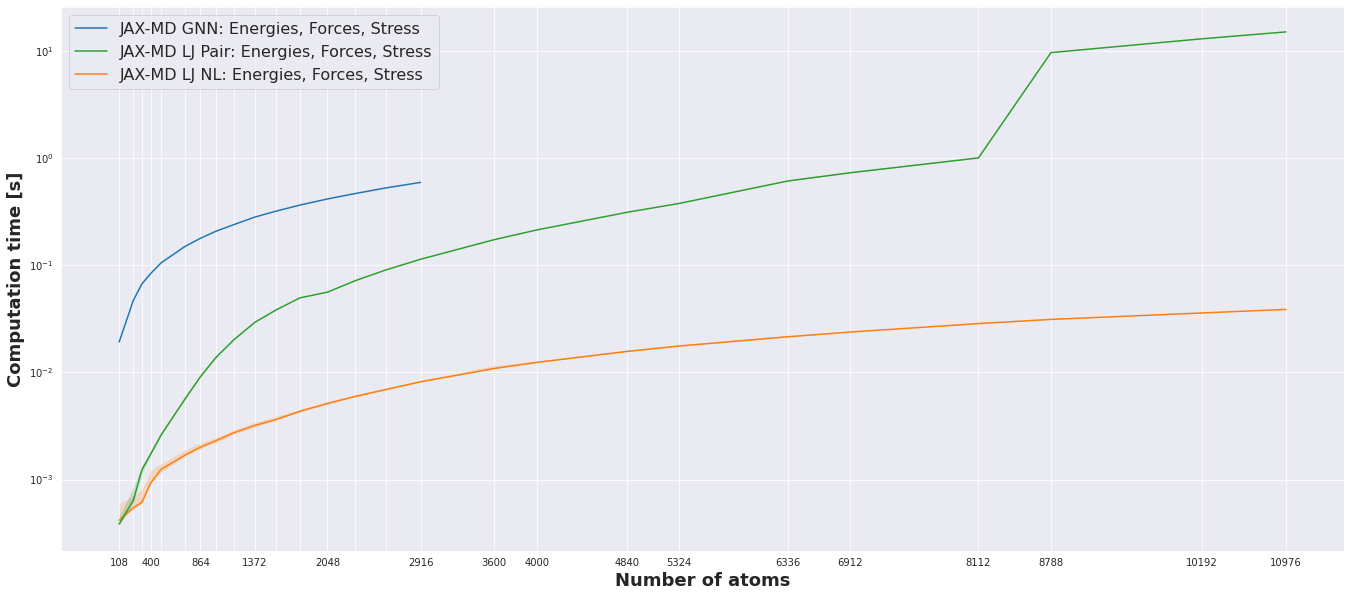

In [31]:
only_stress = list(filter(lambda r: "ASE" not in r.calculator.description and r.calculator._stress and r.calculator._stresses == False, results))
fig, ax = plot_runtimes(results=only_stress, shade_by='minmax', figsize=figsize)

handles, labels = ax.get_legend_handles_labels()
new_handles = [None, None, None]
new_labels = [None, None, None]

# GNN
new_handles[0] = handles[0]
new_labels[0] = labels[0]

# LJ Pair
new_handles[1] = handles[2]
new_labels[1] = labels[2]

# LJ NL
new_handles[2] = handles[1]
new_labels[2] = labels[1]

ax.legend(new_handles, new_labels, prop={'size': 16})
fig.set_visible(True)

## 1.3 energies, forces, stresses

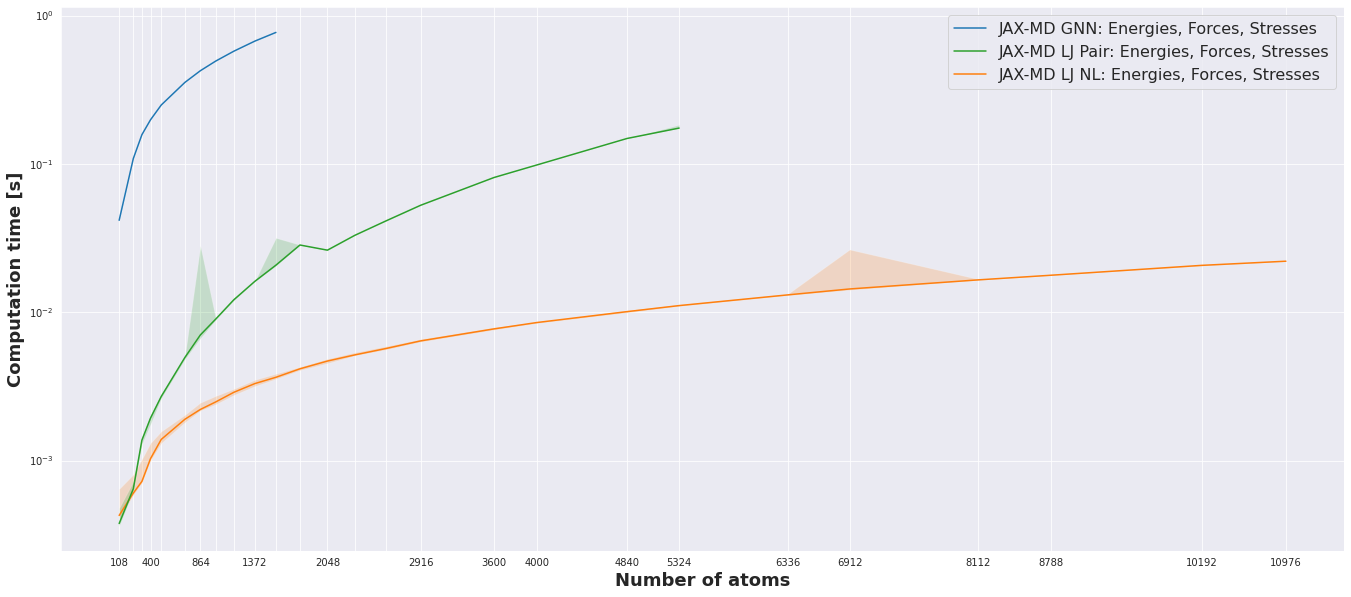

In [33]:
only_stresses = list(filter(lambda r: "ASE" not in r.calculator.description and r.calculator._stress == False and r.calculator._stresses, results))
fig, ax = plot_runtimes(results=only_stresses, shade_by='minmax', figsize=figsize)

handles, labels = ax.get_legend_handles_labels()
new_handles = [None, None, None]
new_labels = [None, None, None]

# GNN
new_handles[0] = handles[0]
new_labels[0] = labels[0]

# LJ Pair
new_handles[1] = handles[2]
new_labels[1] = labels[2]

# LJ NL
new_handles[2] = handles[1]
new_labels[2] = labels[1]

ax.legend(new_handles, new_labels, prop={'size': 16})
fig.set_visible(True)

## 1.4 energies, forces

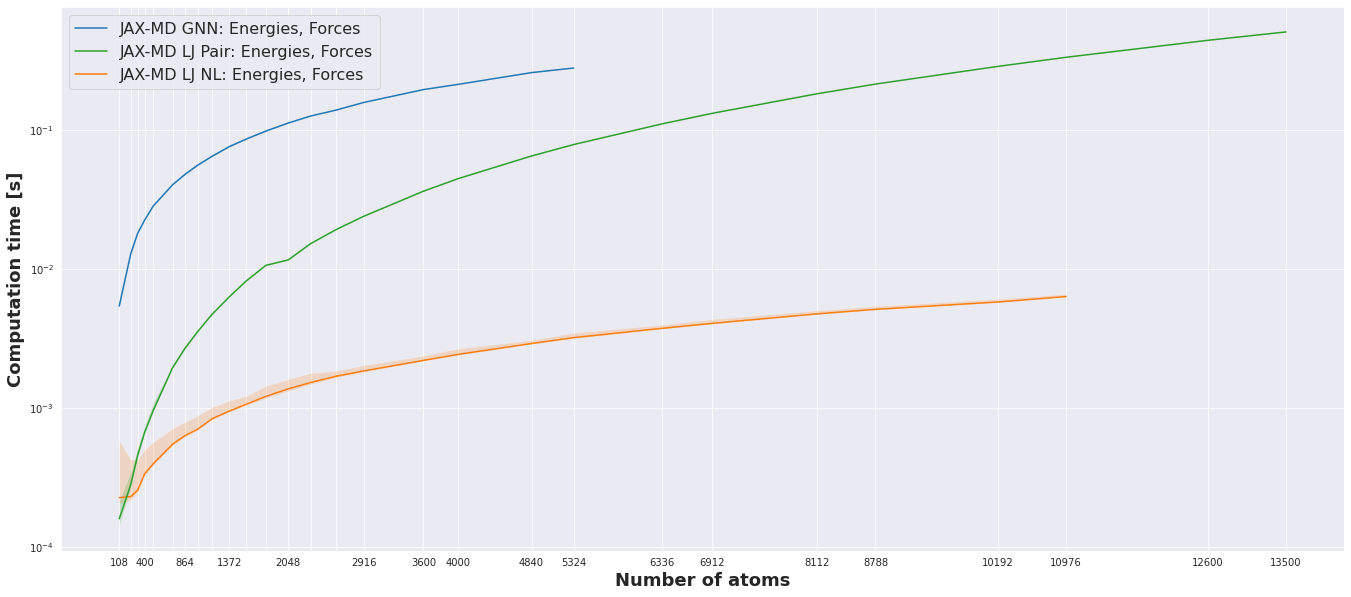

In [40]:
no_stresses = list(filter(lambda r: "ASE" not in r.calculator.description and r.calculator._stress == False and r.calculator._stresses == False, results))
no_stresses = list(filter(lambda r: r.calculator._jit, no_stresses))
fig, ax = plot_runtimes(results=no_stresses, shade_by='minmax', figsize=figsize)

handles, labels = ax.get_legend_handles_labels()
new_handles = [None, None, None]
new_labels = [None, None, None]

# GNN
new_handles[0] = handles[0]
new_labels[0] = labels[0]

# LJ Pair
new_handles[1] = handles[2]
new_labels[1] = labels[2]

# LJ Pair NL
new_handles[2] = handles[1]
new_labels[2] = labels[1]

ax.legend(new_handles, new_labels, prop={'size': 16})
fig.set_visible(True)

## 1.5 energies, forces, `jit=False`

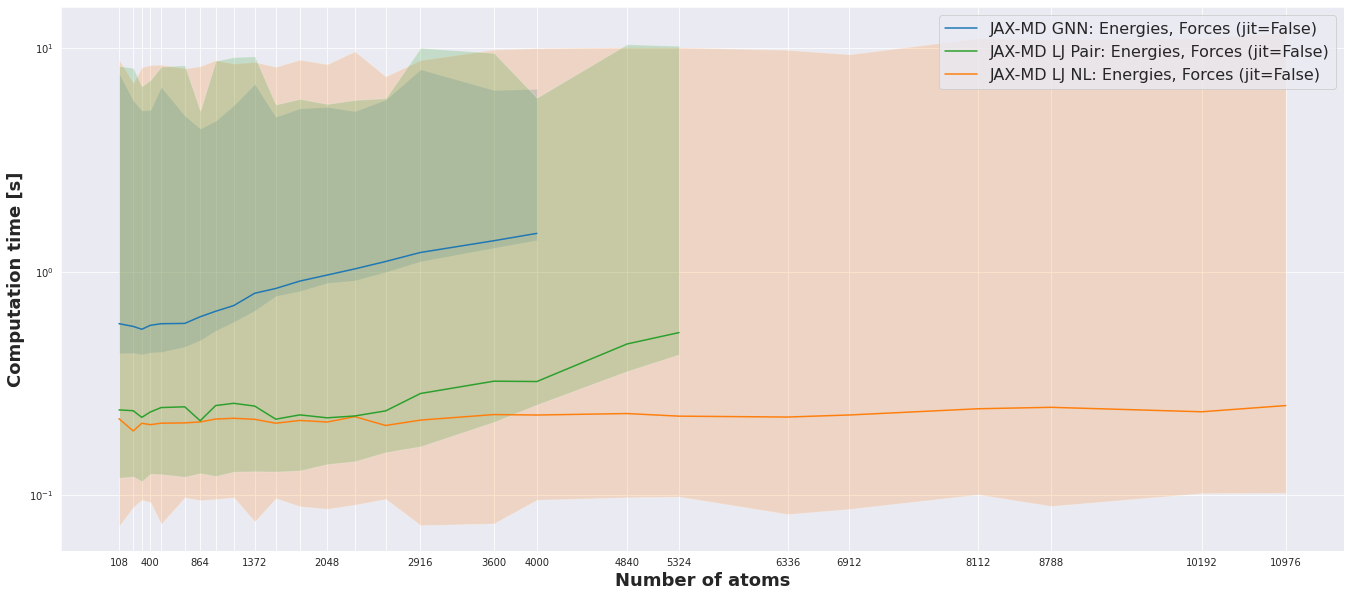

In [51]:
no_stresses_nojit = list(filter(lambda r: "ASE" not in r.calculator.description and r.calculator._jit == False, results))
fig, ax = plot_runtimes(results=no_stresses_nojit, shade_by='minmax', figsize=figsize)

handles, labels = ax.get_legend_handles_labels()
new_handles = [None, None, None]
new_labels = [None, None, None]

# GNN
new_handles[0] = handles[0]
new_labels[0] = labels[0]

# LJ Pair
new_handles[1] = handles[2]
new_labels[1] = labels[2]

# LJ NL
new_handles[2] = handles[1]
new_labels[2] = labels[1]

ax.legend(new_handles, new_labels, prop={'size': 16})
fig.set_visible(True)

# 2. Fastest calculator: Only Neighbor List Lennard-Jones

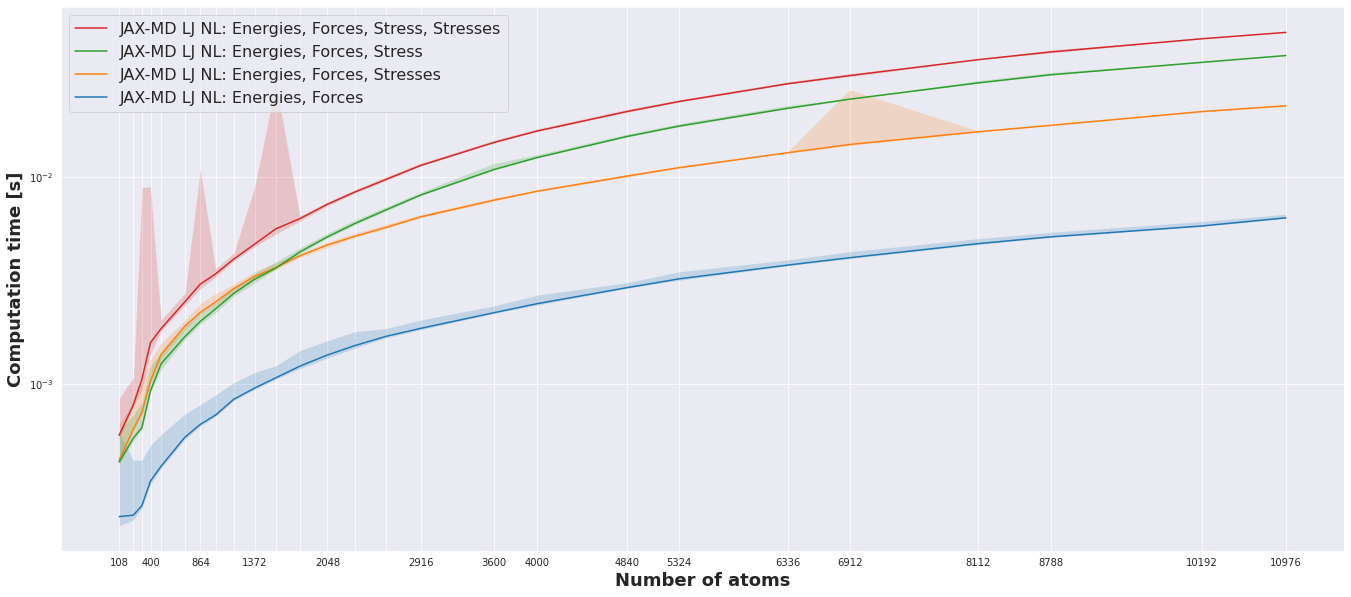

In [88]:
jaxmd_nl_jit = list(filter(lambda r: r.calculator._jit, jaxmd_nl))
fig, ax = plot_runtimes(results=jaxmd_nl_jit, shade_by='minmax', figsize=figsize)

handles, labels = ax.get_legend_handles_labels()
new_handles = [None, None, None, None]
new_labels = [None, None, None, None]

# energies, forces, stress, stresses
new_handles[0] = handles[3]
new_labels[0] = labels[3]

# energies, forces, stress
new_handles[1] = handles[2]
new_labels[1] = labels[2]

# energies, forces, stresses
new_handles[2] = handles[1]
new_labels[2] = labels[1]

# energies, forces
new_handles[3] = handles[0]
new_labels[3] = labels[0]

ax.legend(new_handles, new_labels, prop={'size': 16})
fig.set_visible(True)

# 3. Calculators that reach `n > 5324`
Not sure if useful - **fix legend before potential usage!**

(<Figure size 1656x720 with 1 Axes>,
 <AxesSubplot:xlabel='Number of atoms', ylabel='Computation time [s]'>)

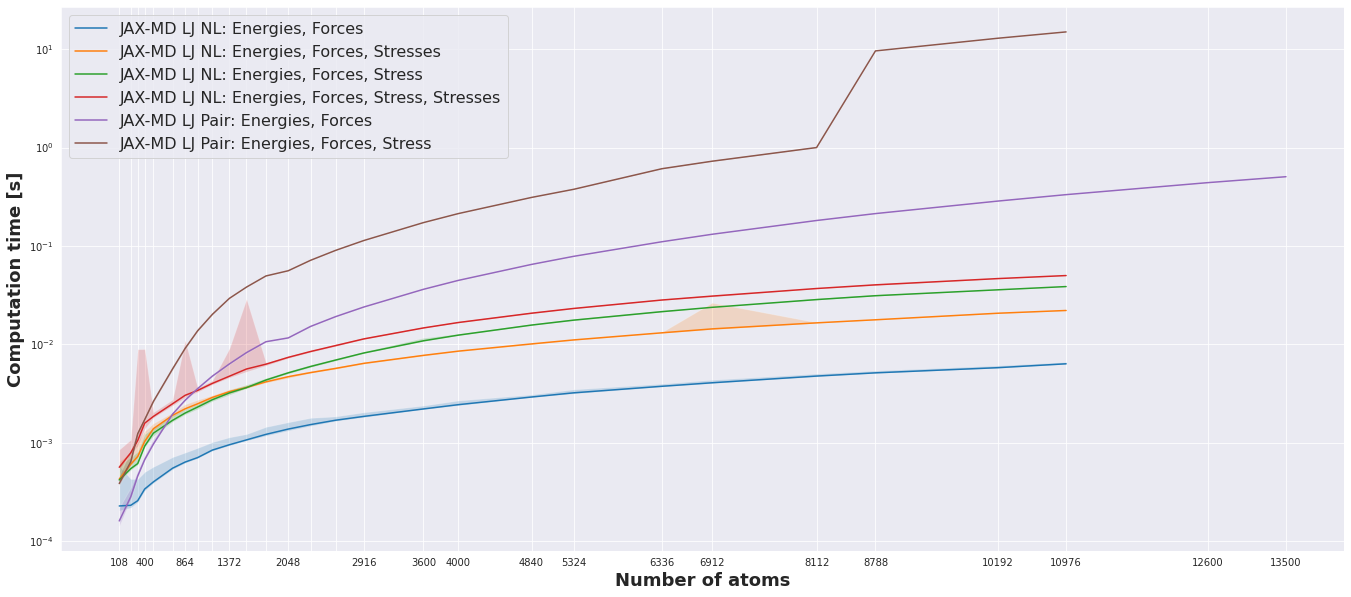

In [86]:
calculator_descriptions = set(map(lambda r: r.calculator.description, filter(lambda r: r.calculator.n > 5324, results)))
calculator_descriptions.remove("ASE Neighbor List")
results_gt_5324 = list(filter(lambda r: r.calculator.description in calculator_descriptions and r.calculator._jit , results))

plot_runtimes(results=results_gt_5324, shade_by='minmax', figsize=figsize)

# Warmup and init time

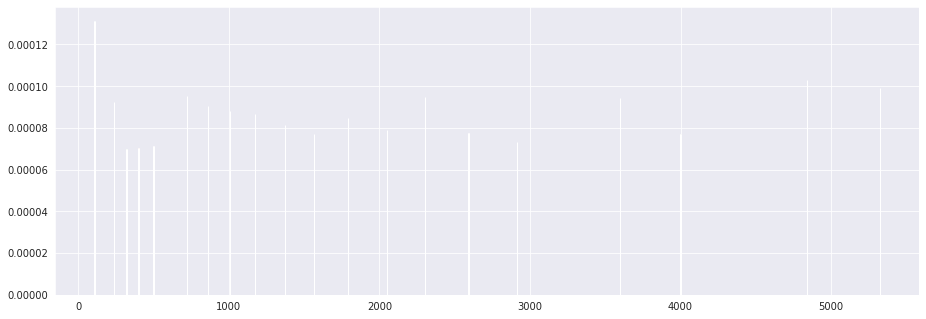

In [166]:
single_calculator = list(filter(lambda r: "JAX-MD Pair (stress=True, stresses=True, jit=True" in r.calculator.description, results))
system_sizes = list(sorted(set([r.n for r in single_calculator])))

results_per_n = list(map(lambda t: list(t[1]), group_by(single_calculator, lambda r: r.calculator.n)))
calcs = list(map(lambda rg: rg[0].calculator, results_per_n))

init_times = [c._initialization_time for c in calcs]
warmup_times = [c._warmup_time for c in calcs]
computation_times = [np.mean([r.computation_time for r in rg]) for rg in results_per_n]


fig = plt.figure()
ax = fig.add_axes([0,0,2,1])

for i, n in enumerate(system_sizes):
#    plt.bar(n, init_times[i])
    ax.bar(n, init_times[i])

plt.show()





# Appendix

## 1. Runtime Variance

for energies, forces, stress, stresses

### 1.1 JAX-MD LJ Pair

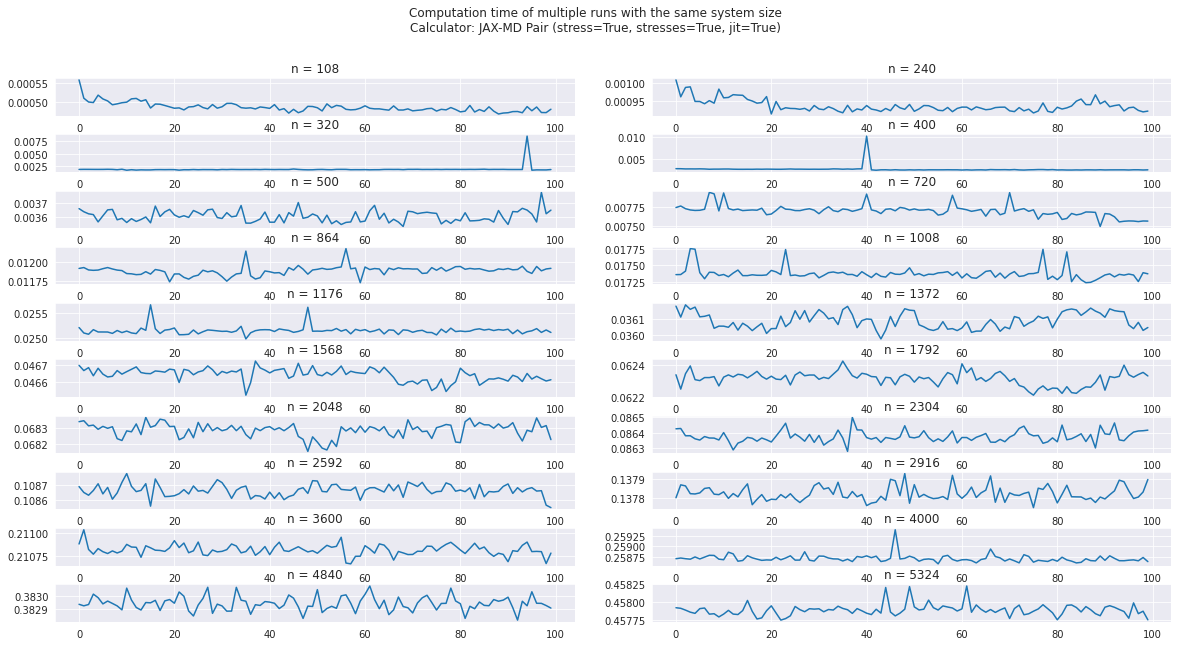

In [89]:
single_calculator = filter(lambda r: "JAX-MD Pair (stress=True, stresses=True, jit=True" in r.calculator.description, results)
plot_runtime_variances(list(single_calculator))

### 1.2 JAX-MD LJ Neighbor List

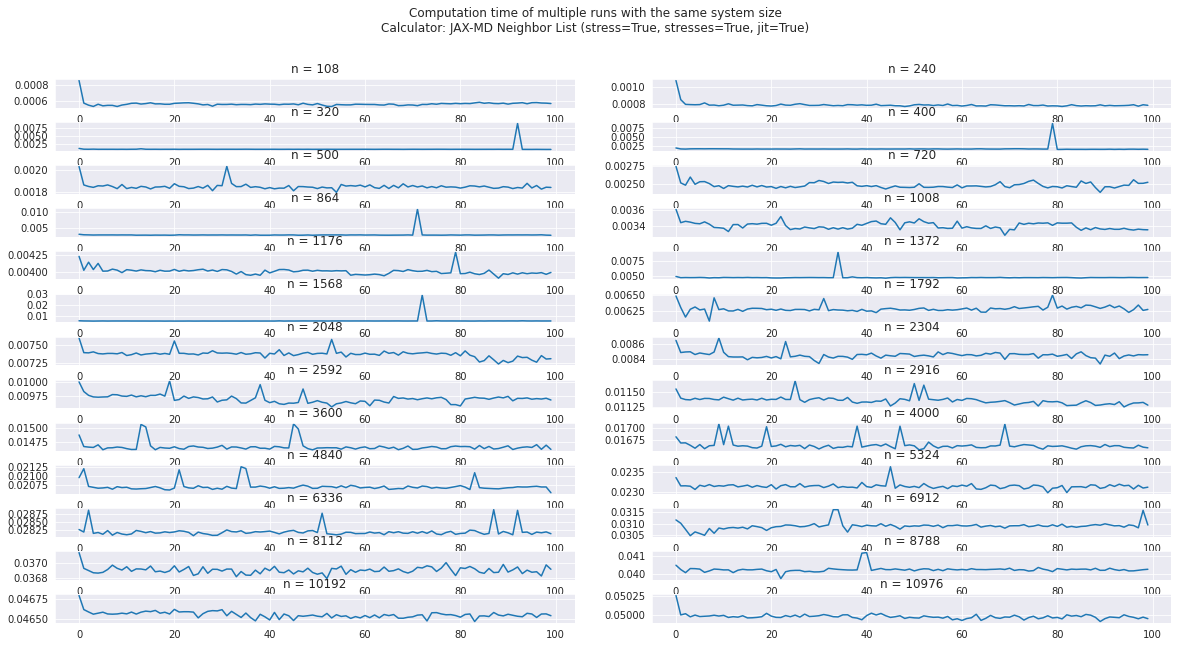

In [90]:
single_calculator = filter(lambda r: "JAX-MD Neighbor List (stress=True, stresses=True, jit=True" in r.calculator.description, results)
plot_runtime_variances(list(single_calculator))

### 1.3 JAX-MD GNN

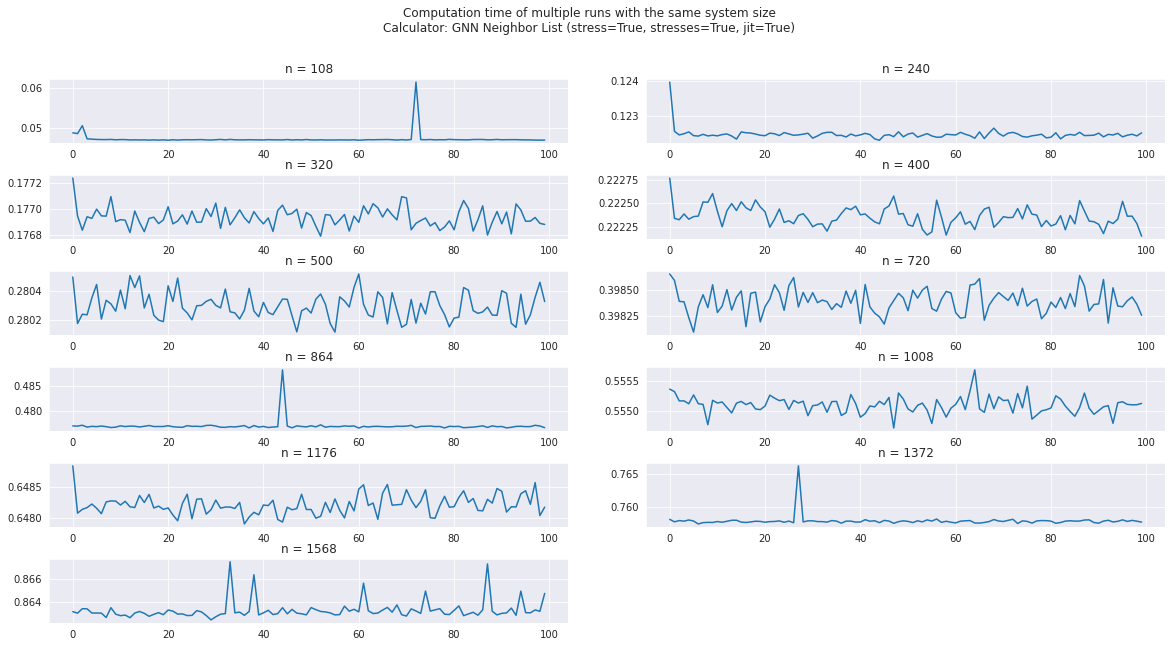

In [99]:
single_calculator = filter(lambda r: "GNN Neighbor List (stress=True, stresses=True, jit=True)" in r.calculator.description, results)
plot_runtime_variances(list(single_calculator))

# TODO
- Warm-up plots


In [ ]:
# misc - is this still needed?
system_sizes = [len(atoms) for atoms in super_cells]            
_, oom_calculators = load_calculators_from_pickle("/home/pop518504/git/gknet-benchmarks/benchmarks/oom_analysis/oom_analysis.pickle")
print_oom_behavior_runtime_vs_dedicated(system_sizes, results, oom_calculators)